Questo codice esegue l'analisi dell'importanza delle caratteristiche (feature importance) utilizzando un modello di classificazione RandomForest.

L'output del codice sarà una lista delle feature selezionate con i relativi valori di importanza. Questo può essere utile per comprendere quali variabili hanno maggiore impatto nella previsione delle anomalie.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

data = pd.read_csv('EIF_scores.csv')

#Trasforma feature non numeriche in numeriche con LabelEncoder

encoder = LabelEncoder()
data['country_encoded'] = encoder.fit_transform(data['country'])
data['iban_encoded'] = encoder.fit_transform(data['IBAN_bankCode'])
data['businessName_encoded'] = encoder.fit_transform(data['businessName'])
data['userAgent_browserFamily_encoded'] = encoder.fit_transform(data['userAgent_browserFamily'])
data['userAgent_osFamily_encoded'] = encoder.fit_transform(data['userAgent_osFamily'])
data['SIA_encoded'] = encoder.fit_transform(data['SIA'])
data['companyType_encoded'] = encoder.fit_transform(data['companyType'])

#Converte la colonna 'timestamp' in tipo datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

#Converte la colonna "timestamp" da un formato di data e ora a un timestamp Unix espresso in millisecondi
data['timestamp'] = data['timestamp'].astype(int) // 10**9

features = ['customerId', 'timestamp', 'amount', 'userAgent_isPc', 'CAP', 'SAE', 'RAE', 'country_encoded', 'iban_encoded', 'businessName_encoded', 'userAgent_browserFamily_encoded', 'userAgent_osFamily_encoded', 'SIA_encoded', 'companyType_encoded']

#Addestramento modello RandomForestRegressor
X = data[features]
y = data['scores']
rf = RandomForestRegressor()
rf.fit(X, y)

# Calcola l'importanza delle feature in base alla variabile target 'scores'
feature_importances = rf.feature_importances_

print("Feature Importances:")
for feature, importance in zip(features, feature_importances):
    print(f"{feature}: {importance:.2f}")

Feature Importances:
customerId: 0.01
timestamp: 0.01
amount: 0.26
userAgent_isPc: 0.00
CAP: 0.04
SAE: 0.20
RAE: 0.07
country_encoded: 0.02
iban_encoded: 0.13
businessName_encoded: 0.01
userAgent_browserFamily_encoded: 0.09
userAgent_osFamily_encoded: 0.05
SIA_encoded: 0.09
companyType_encoded: 0.02


Questo codice identifica le anomalie nei dati basandosi sullo z-score della colonna "amount" e salva queste anomalie in un file Excel.
Viene calcolato lo z-score per ogni valore nella colonna "amount". Lo z-score è una misura statistica che indica quanto un dato valore si discosta dalla media in termini di deviazioni standard. È utilizzato per valutare quanto un dato valore sia atipico o fuori dalla norma all'interno di un insieme di dati.
Viene impostata una soglia per identificare le anomalie. Le righe con uno z-score che supera questa soglia verranno considerate probabili anomalie.
Viene stampato lo z-score con la rispettiva colonna scores per verificare se uno scores alto corrisponde ad uno z-scores al di sopra della soglia.

In [ ]:
import pandas as pd

#Montaggio Google Drive
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('EIF_scores.csv')

#Media, varianza e deviazione standard di "amount"
media_importo = df['amount'].mean()
varianza_importo = df['amount'].var()
deviazione_standard_importo = df['amount'].std()

#Approssima a due cifre dopo la virgola
media_importo = round(media_importo, 2)
varianza_importo = round(varianza_importo, 2)

print(f"Media dell'importo: {media_importo}")
print(f"Varianza dell'importo: {varianza_importo}")

#Calcola lo z-score per ogni valore di "amount"
df['z_score'] = (df['amount'] - media_importo) / deviazione_standard_importo

#Soglia al di sopra della quale viene stampato lo z-score
soglia = 3

#Righe con uno z-score maggiore della soglia
anomalie = df[df['z_score'].abs() > soglia]

print(anomalie[['z_score', 'scores']])

anomalie_selezionate = anomalie[['z_score', 'scores']]

#Salva le colonne selezionate su Google Drive in un file Excel
anomalie_selezionate.to_excel('/content/drive/MyDrive/anomalie_EIF.xlsx', index=False)




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Media dell'importo: 4094.35
Varianza dell'importo: 495432714.87
         z_score    scores
761    22.279565  0.693325
775     3.267918  0.637874
808    15.050501  0.684945
966     6.344879  0.664840
968    20.033214  0.651059
...          ...       ...
88919   3.652821  0.572408
90629   3.410215  0.583648
90631   4.004105  0.642073
90905  11.946350  0.619383
90924   4.084120  0.587128

[632 rows x 2 columns]


Questo codice crea due istogrammi per visualizzare la distribuzione dei valori nella colonna "amount":


1.   Il primo istogramma fornisce una rappresentazione visuale della distribuzione dei dati relativi all'importo delle transazioni.
2.   Il secondo istogramma aiuta a visualizzare come sono distribuiti gli importi delle transazioni identificate come possibili anomalie.

Visualizzare entrambi gli istogrammi può servire a confrontare la distribuzione degli importi delle transazioni normali con quella delle transazioni anomale

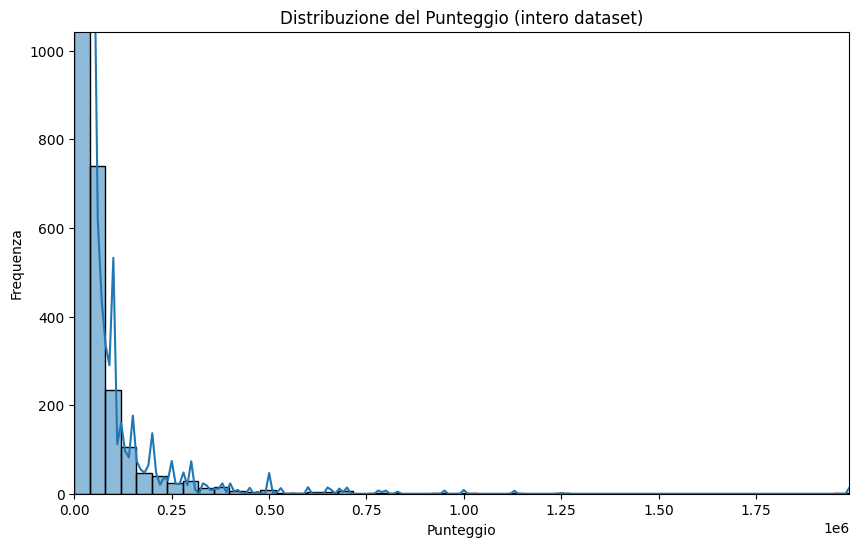

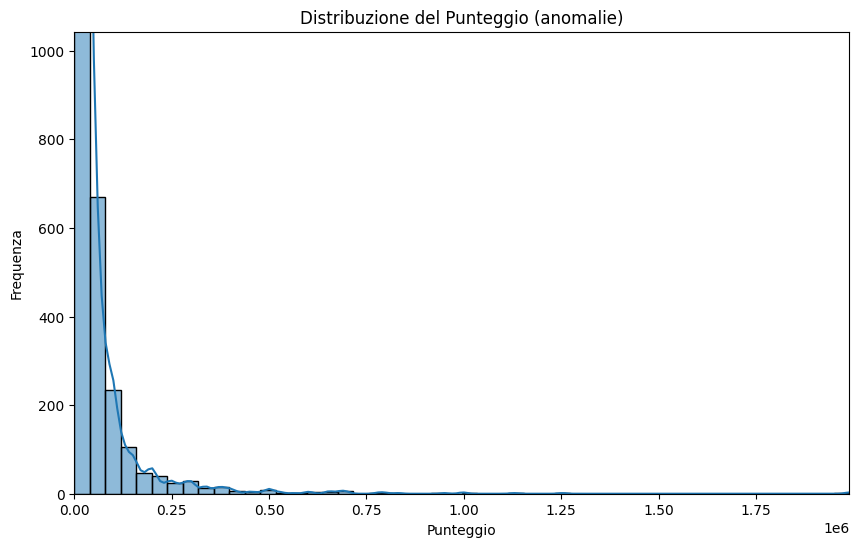

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df2 = pd.read_csv('EIF_scores.csv')

soglia_anomalie = 0.5
anomalie2 = df2[df2['scores'] > soglia_anomalie]

#Istogramma per l'intero dataset
plt.figure(figsize=(10, 6))
sns.histplot(df2['amount'], bins=50, kde=True)

# Imposta l'intervallo dell'asse X in base ai dati reali
plt.xlim(0, df2['amount'].max())

# Imposta l'intervallo dell'asse Y in base ai dati reali
plt.ylim(0, df2['amount'].value_counts().max())

plt.title('Distribuzione del Punteggio (intero dataset)')
plt.xlabel('Punteggio')
plt.ylabel('Frequenza')
plt.show()

#Istogramma per le anomalie
plt.figure(figsize=(10, 6))
sns.histplot(anomalie2['amount'], bins=50, kde=True)

# Imposta l'intervallo dell'asse X in base ai dati reali
plt.xlim(0, df2['amount'].max())

# Imposta l'intervallo dell'asse Y in base ai dati reali
plt.ylim(0, df2['amount'].value_counts().max())

plt.title('Distribuzione del Punteggio (anomalie)')
plt.xlabel('Punteggio')
plt.ylabel('Frequenza')
plt.show()



Questo codice esegue un'analisi delle correlazioni tra le variabili presenti nel dataset e la colonna "scores".  Queste correlazioni possono fornire informazioni su quanto una variabile è correlata alla presenza di anomalie nei dati. Le correlazioni variano da -1 a 1, dove -1 indica una forte correlazione negativa, 1 indica una forte correlazione positiva e 0 indica assenza di correlazione.

In [ ]:
import pandas as pd

data = pd.read_csv('EIF_scores.csv')

#Calcola la correlazione tra tutte le variabili e "scores"
correlations = data.corrwith(data['scores'])

correlations = correlations.drop(['scores'])

correlations = correlations.drop(['Unnamed: 0'])


print("Correlazioni con 'scores' (esclusa 'scores' vs. 'scores' e 'Unnamed: 0' vs. 'scores'):")
print(correlations)


Correlazioni con 'scores' (esclusa 'scores' vs. 'scores' e 'Unnamed: 0' vs. 'scores'):
customerId        0.058564
amount            0.327040
userAgent_isPc   -0.133598
CAP              -0.028335
SAE               0.362548
RAE              -0.097765
dtype: float64


<ipython-input-5-9df41020019c>:6: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corrwith(data['scores'])


Rappresentazione in un grafico a barre orizzontali delle correlazioni precedentemente trovate.

<ipython-input-7-07b026e9e277>:8: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corrwith(data['scores'])


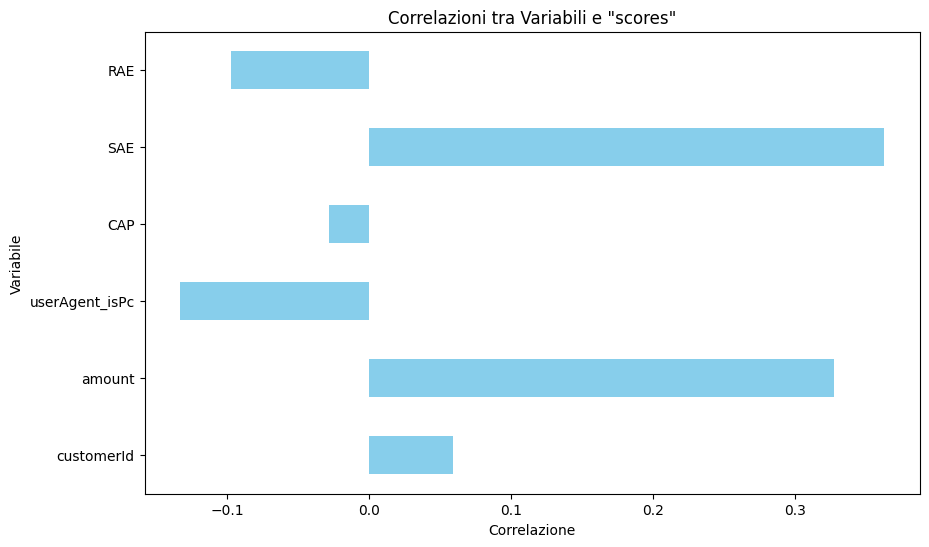

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('EIF_scores.csv')

#Crea un grafico a barre orizzontali per le correlazioni

correlations = data.corrwith(data['scores'])

correlations = correlations.drop(['scores'])

correlations = correlations.drop(['Unnamed: 0'])


plt.figure(figsize=(10, 6))
correlations.plot(kind='barh', color='skyblue')
plt.xlabel('Correlazione')
plt.ylabel('Variabile')
plt.title('Correlazioni tra Variabili e "scores"')
plt.show()


Questo codice consente di visualizzare come le possibile anomalie si distribuiscono nel tempo, consentendo di individuare eventuali tendenze o picchi di anomalie in base alle date.

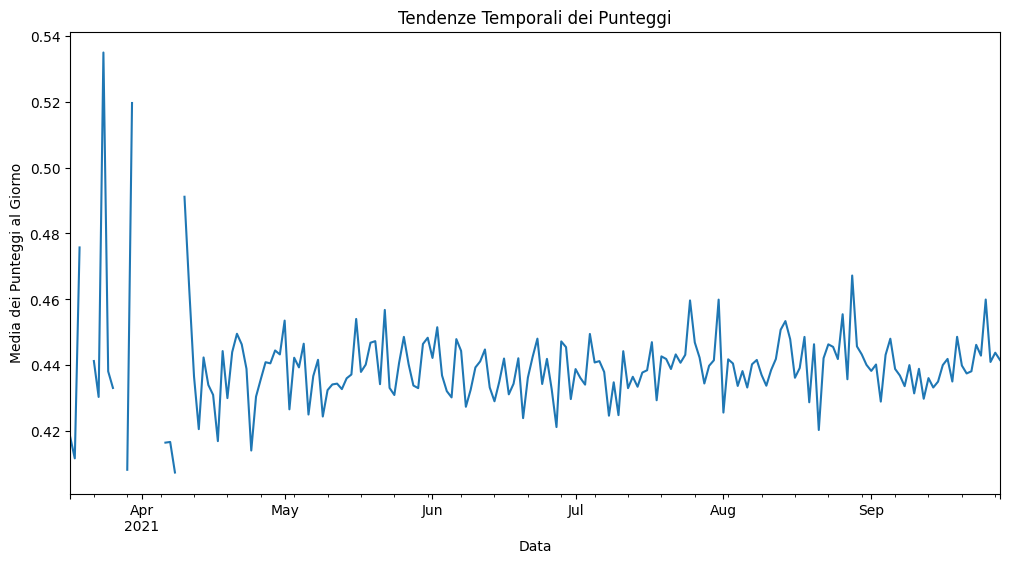

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('EIF_scores.csv')

data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)

#Raggruppa per giorno e calcola la media del punteggio 'scores'
scores_over_time = data.resample('D')['scores'].mean()

#Visualizza le tendenze temporali dei punteggi 'scores'
plt.figure(figsize=(12, 6))
scores_over_time.plot()
plt.title('Tendenze Temporali dei Punteggi')
plt.xlabel('Data')
plt.ylabel('Media dei Punteggi al Giorno')
plt.show()
